### **Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from math import sqrt
from sklearn.decomposition import PCA
import pickle

### **Settings**

In [30]:
# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### **Importing the data | Normalizing | Removing Null Values**

In [31]:
data = pd.read_csv('../data/base.csv')
data.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,7.569000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,1.897926e+05,4.451028e+07,3.396815e+07,7.073623e+07,2.831172e+07,4.687958e+06,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,5.435186e+05,4.674534e+08,4.946074e+08,8.878891e+08,2.576755e+08,3.773716e+07,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,0.000000e+00,-1.700000e+01,-1.134941e+06,-1.700000e+01,-1.867197e+08,0.000000e+00,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,1.510000e+04,8.875850e+05,1.829700e+05,1.049740e+06,2.328920e+05,0.000000e+00,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,3.500000e+04,3.996630e+06,1.335189e+06,4.637565e+06,1.569857e+06,0.000000e+00,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,1.000000e+05,1.635117e+07,7.449366e+06,1.916744e+07,8.036921e+06,7.416500e+05,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,1.070000e+07,2.903832e+10,2.750382e+10,5.482350e+10,1.292328e+10,7.406315e+08,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [32]:
pd.set_option('display.max_columns', None)
data.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,0.603774,0.485811,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,0.169811,0.000000,50000.0,NaN,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [33]:
data.isnull().sum()

numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                 

In [34]:
data.drop([
  'numero_solicitacao',
  'razaoSocial',
  'nomeFantasia',
  'status',
  'restricoes',
  'scorePontualidade',
  'dataAprovadoNivelAnalista',
  'limiteEmpresaAnaliseCredito',
  'valorAprovado',
  'anoFundacao',
  'custos',
  'periodoDemonstrativoEmMeses',
  'dataAprovadoEmComite',
  'dashboardCorrelacao',
  'diferencaPercentualRisco',
  'percentualRisco',
  'periodoBalanco',
  'duplicatasAReceber',
  'primeiraCompra',
  'percentualProtestos',
  'prazoMedioRecebimentoVendas',
  'cnpjSemTraco'
], axis=1, inplace=True)

In [35]:
data.isnull().sum()

maiorAtraso                  0
margemBrutaAcumulada         0
titulosEmAberto              0
valorSolicitado              0
definicaoRisco               0
ativoCirculante           4240
passivoCirculante         4240
totalAtivo                4240
totalPatrimonioLiquido    4240
endividamento             4240
estoque                   4240
faturamentoBruto           750
margemBruta                750
intervaloFundacao          745
capitalSocial              745
empresa_MeEppMei           745
dtype: int64

In [36]:
num_data = data._get_numeric_data().columns.tolist()
cat_data = set(data.columns) - set(num_data)

print(num_data, cat_data)

['maiorAtraso', 'margemBrutaAcumulada', 'titulosEmAberto', 'valorSolicitado', 'ativoCirculante', 'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 'endividamento', 'estoque', 'faturamentoBruto', 'margemBruta', 'capitalSocial'] {'intervaloFundacao', 'empresa_MeEppMei', 'definicaoRisco'}


In [37]:
for i in cat_data:
    print(data[i].value_counts())

Acima de 17 anos    2681
De 0 a 5 anos       2199
De 6 a 10 anos      1785
De 11 a 16 anos     1563
Name: intervaloFundacao, dtype: int64
False    5046
True     3182
Name: empresa_MeEppMei, dtype: int64
De 11 a 30 % - Baixo         4486
De 31 a 50 % - Médio         2509
De 0 a 10 % - Muito Baixo    1590
De 51 a 80 % - Alto           388
Name: definicaoRisco, dtype: int64


In [38]:
data['definicaoRisco'].value_counts()

De 11 a 30 % - Baixo         4486
De 31 a 50 % - Médio         2509
De 0 a 10 % - Muito Baixo    1590
De 51 a 80 % - Alto           388
Name: definicaoRisco, dtype: int64

In [39]:
# transform categorical data to numeric
data['definicaoRisco'] = data['definicaoRisco'].map({'De 11 a 30 % - Baixo': 1, 'De 31 a 50 % - Médio': 2, 'De 0 a 10 % - Muito Baixo': 3, 'De 51 a 80 % - Alto': 4, 'nan': 1})
data['empresa_MeEppMei'] = data['empresa_MeEppMei'].map({True: 1, False: 0, 'nan': 0})
data['intervaloFundacao'] = data['intervaloFundacao'].map({ 'Acima de 17 anos': 4, 'De 11 a 16 anos': 3, 'De 6 a 10 anos': 2, 'De 0 a 5 anos': 1, 'nan': 1 })

In [40]:
data['empresa_MeEppMei'].fillna(0, inplace=True)
data['intervaloFundacao'].fillna(1, inplace=True)

### **Outliers**

In [41]:
# find outliers
features = data.select_dtypes(exclude = ["object"]).columns
features

Index(['maiorAtraso', 'margemBrutaAcumulada', 'titulosEmAberto',
       'valorSolicitado', 'definicaoRisco', 'ativoCirculante',
       'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido',
       'endividamento', 'estoque', 'faturamentoBruto', 'margemBruta',
       'intervaloFundacao', 'capitalSocial', 'empresa_MeEppMei'],
      dtype='object')

In [42]:
outliers = data[features]

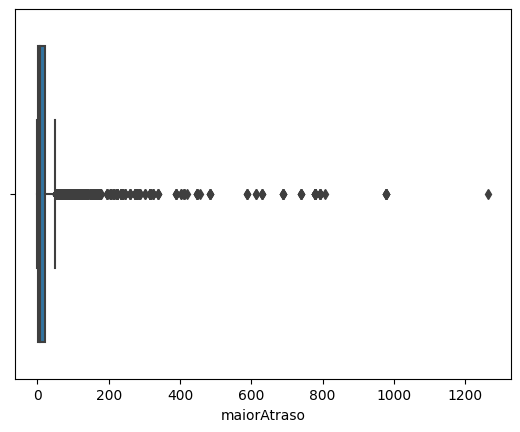

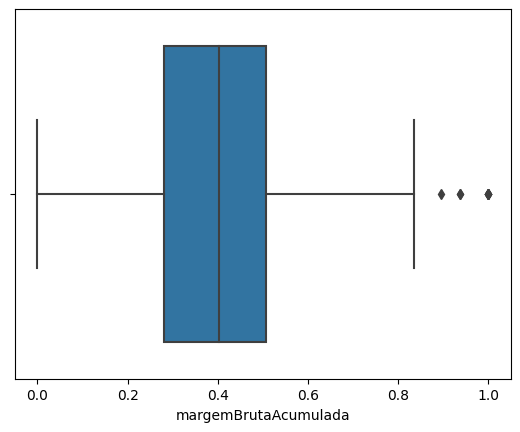

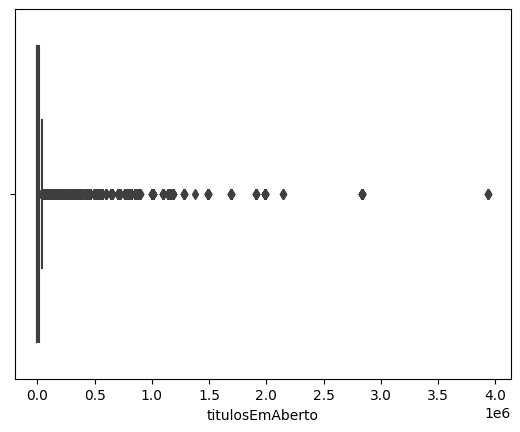

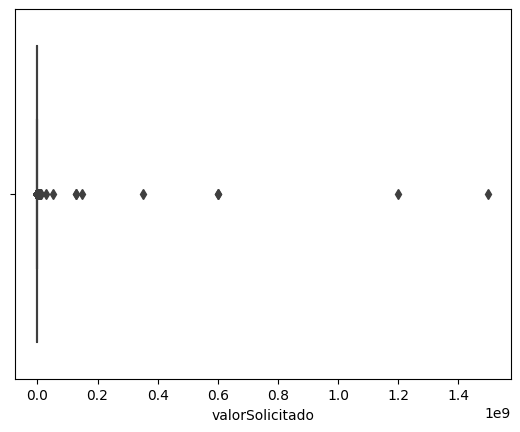

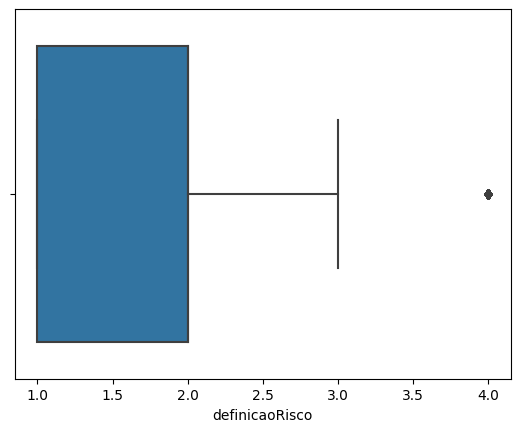

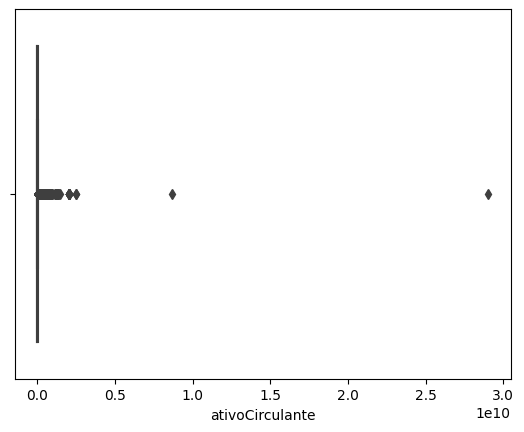

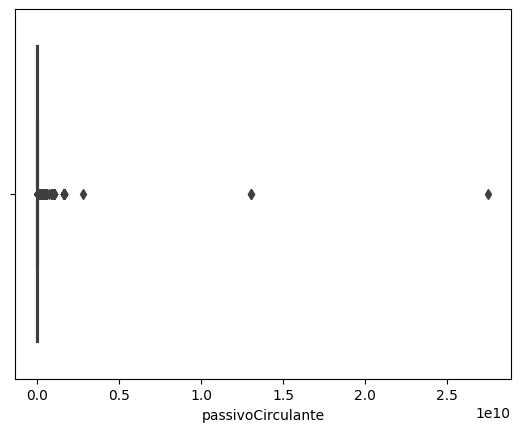

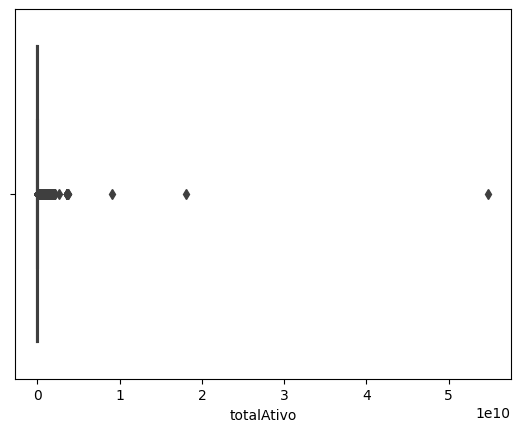

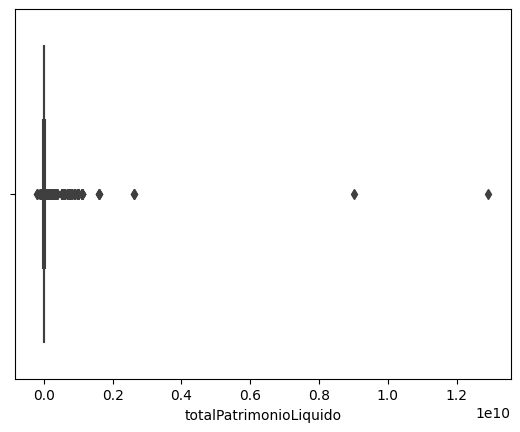

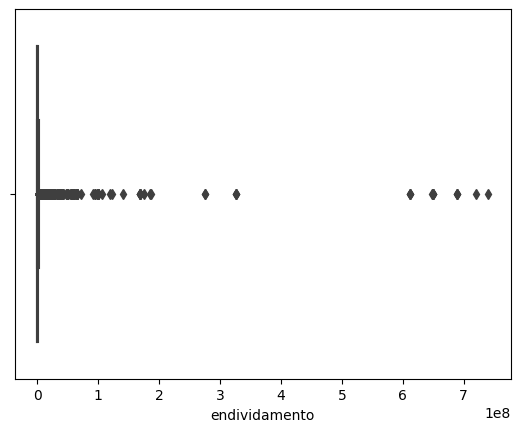

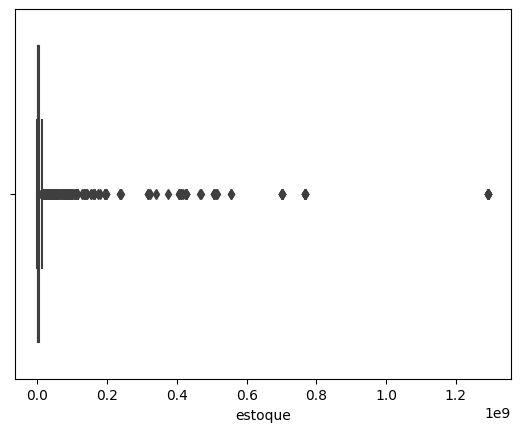

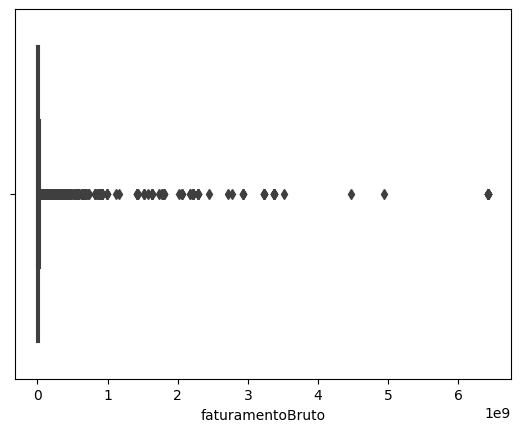

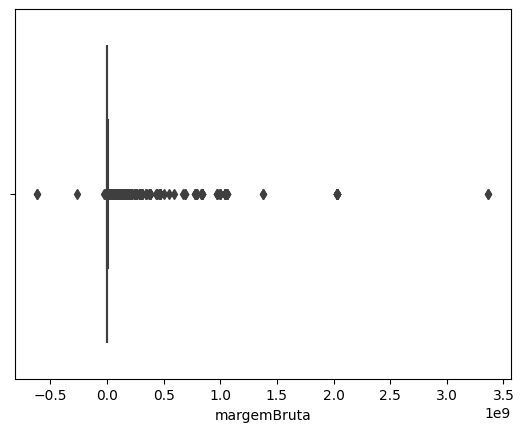

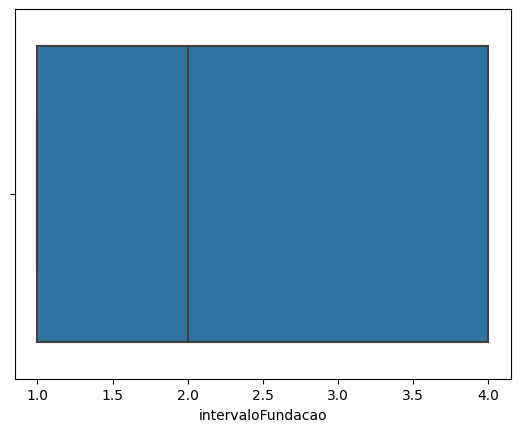

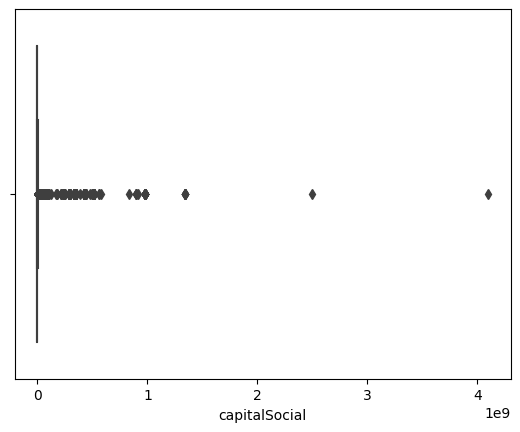

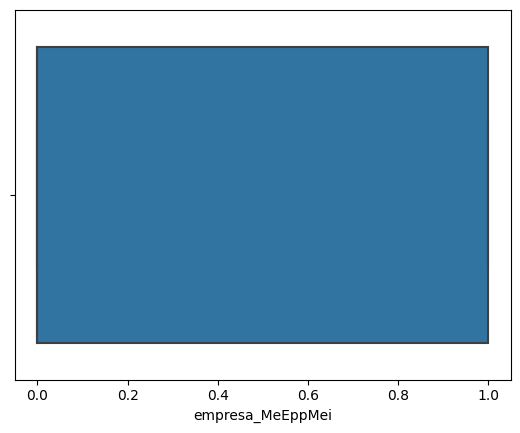

In [43]:
for i in outliers:
    sns.boxplot(x=outliers[i])
    plt.show()

In [4]:
# Function to remove outliers based on the interquartile distance
def rm_outliers(data):
    df1 = data.copy()
    data = data[features]
    # q1 = the first quartil | q3 = the third quartil | q2 = interquartile distance
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    q2 = q3 - q1
    # setting the areas = lower and upper bounds equals the median times 1.5
    lower_bound = q1 - (1.5 * q2)
    upper_bound = q3 + (1.5 * q2)
    
    for col in data.columns:
        # if the data in each column that has outliers were below the lower bound then it will set it to the lower bound area. Same with upper bound.
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
                
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        df1[col] = data[col]
        
    return(df1)

In [45]:
data = rm_outliers(data)

In [46]:
dt_outliers = data[features]

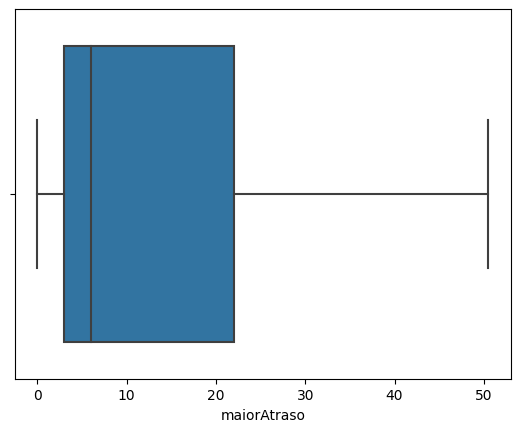

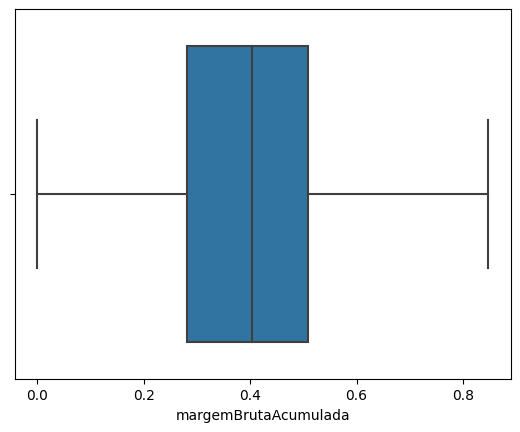

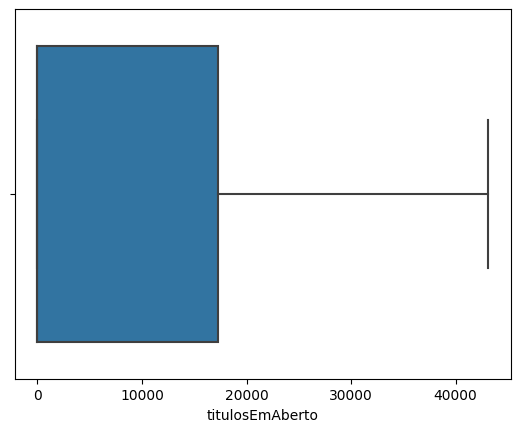

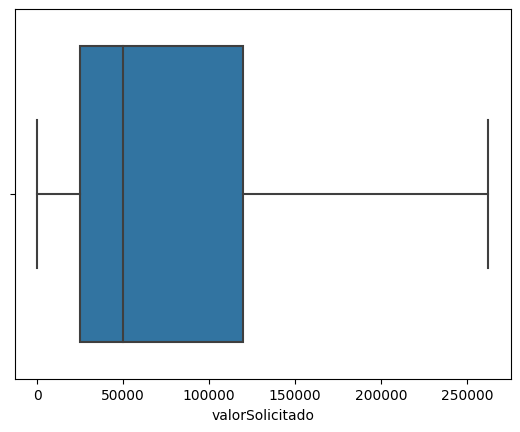

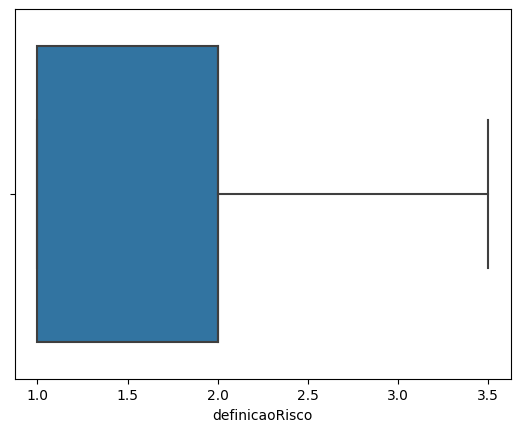

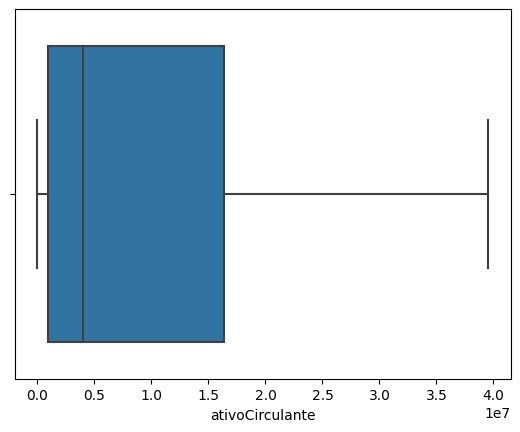

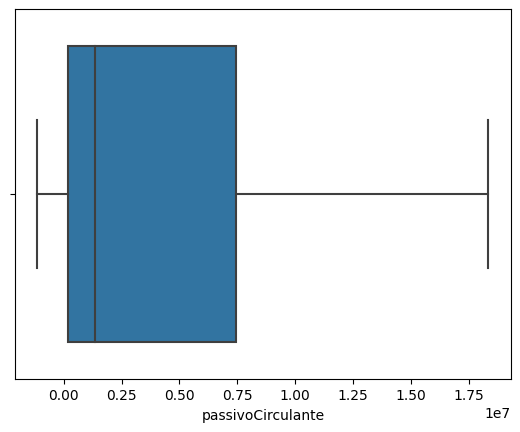

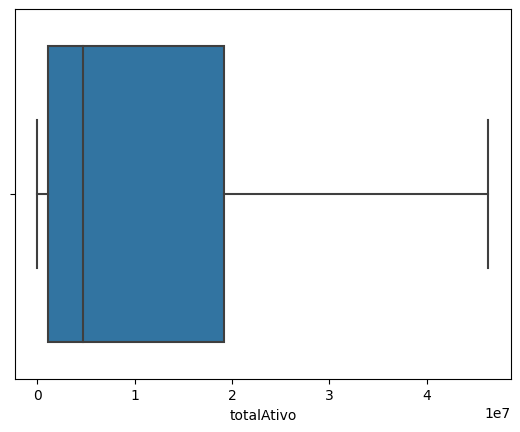

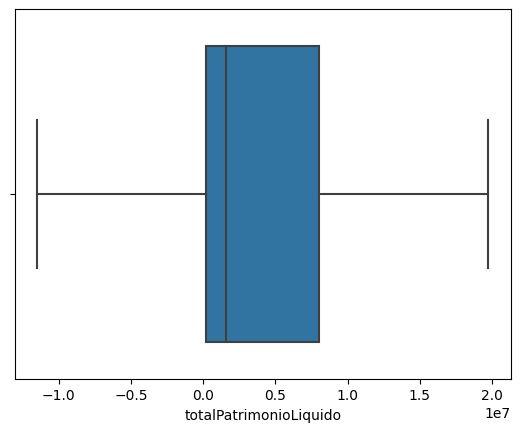

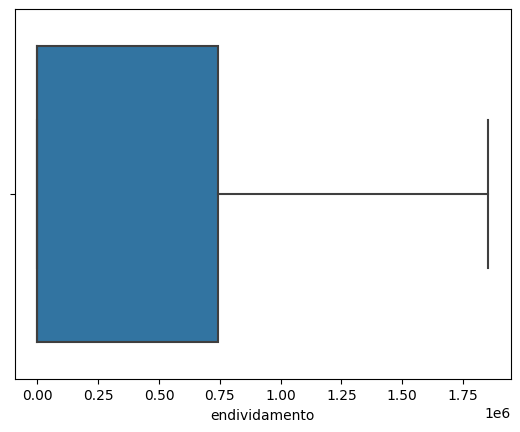

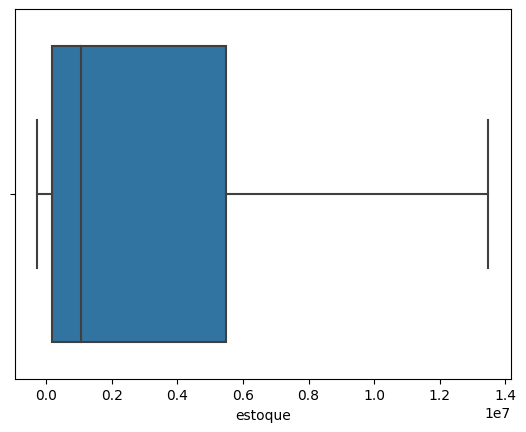

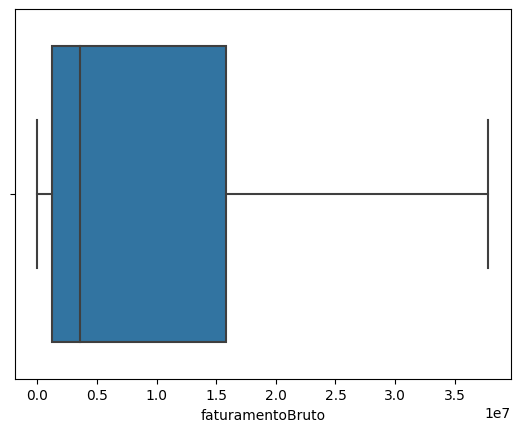

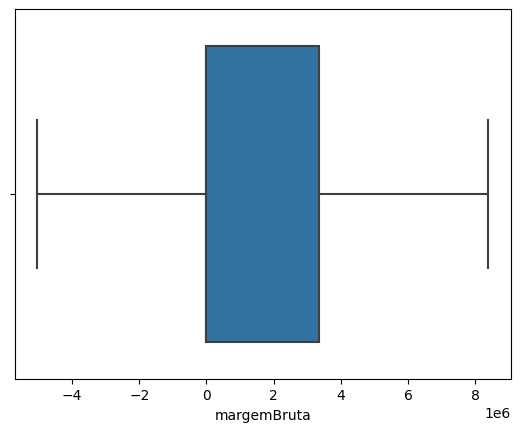

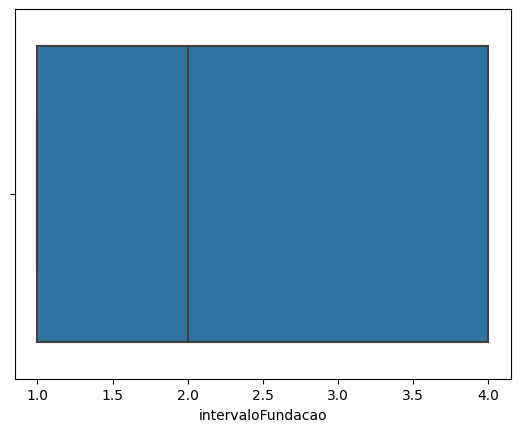

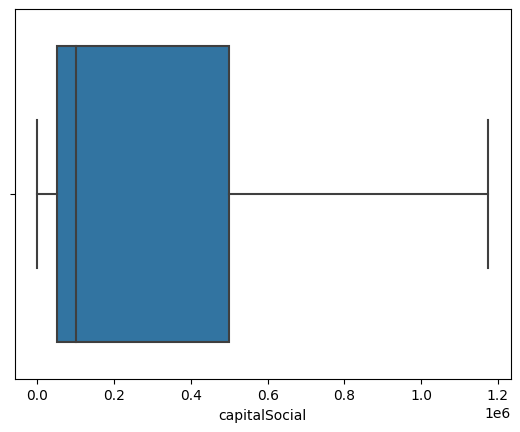

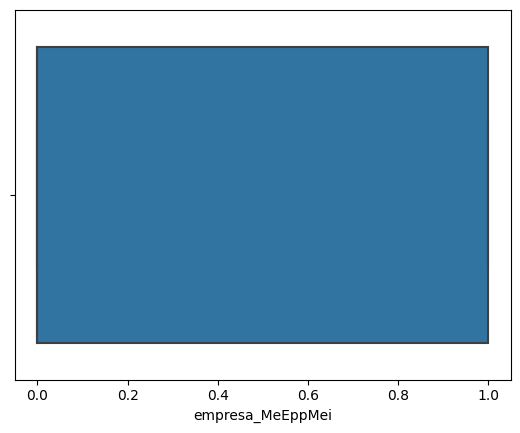

In [47]:
for i in dt_outliers:
    sns.boxplot(x=dt_outliers[i])
    plt.show()

### **Filling null values with median**

In [48]:
def fill_median(d, col):
  d.loc[d[col].isnull(), col] = d[col].median()

for col in data.columns:
  if data[col].isnull().sum() > 0:
    fill_median(data, col)

### **Using the Elbow Method to find out how many clusters we need**

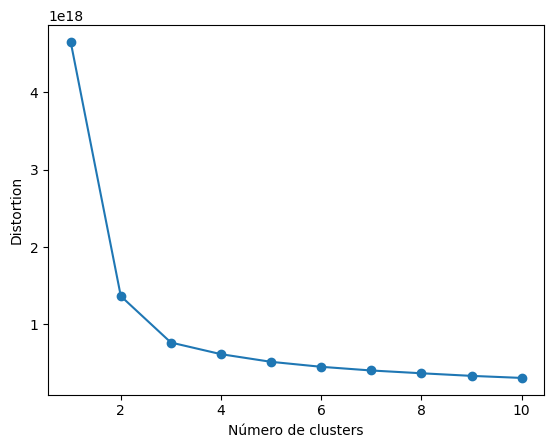

In [49]:
# Executar K-means com diferentes números de clusters
to_cluster = data.copy()
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(to_cluster)
    distortions.append(km.inertia_)

# Plotar o gráfico de cotovelo
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
# cluster number
n = 4

In [51]:
kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
kmeans.fit(X=to_cluster)
clusters = kmeans.fit_predict(to_cluster)
data['cluster'] = clusters

In [52]:
data['cluster'].value_counts()

0    6754
3     825
2     771
1     623
Name: cluster, dtype: int64

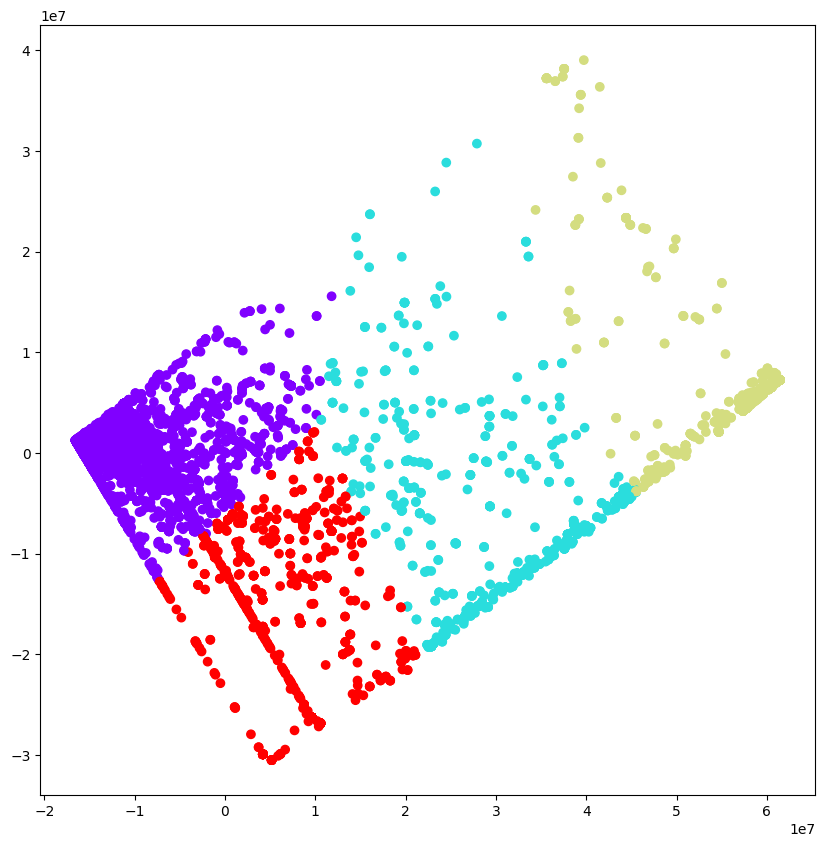

In [53]:
pca = PCA(n_components=n)
pca.fit(to_cluster)
pca_data = pca.transform(to_cluster)

plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='rainbow')
plt.show()

### **Saving the model**

In [54]:
filename = '../models/cluster.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [55]:
pickle_model = pickle.load(open(filename, 'rb'))
pickle_model.predict(to_cluster)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)